In [773]:
root_folder = '/content/drive/MyDrive/магистратура/Обработка и анализ изображений/other/'

In [774]:
from copy import deepcopy
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [775]:
def print_img(img, title = '', shape = (12,9)):
  plt.figure(figsize = shape)
  plt.title(title)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def print_img_grey(img, title = '', shape = (12,9)):
  plt.figure(figsize = shape)
  plt.title(title)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))


def reverse_shape(shape):
  result = []
  for i in range(len(shape)):
    result.append(shape[len(shape)-i-1])
  return(tuple(result))

# def reccurent_finder(first_child, hier, contours, max = 0):
#   square = cv2.contourArea(contours[first_child])
#   if square > max:
#     index = first_child
#     max = square
#   else:
#     index = -1
#     max = -1

#   if hier[first_child][1] > 0:
#     index_next, max_next = 

In [776]:
img_lab = cv2.imread(root_folder+"lab2.png")

## Задание 1

In [777]:
_, img_contours = cv2.threshold(cv2.cvtColor(img_lab, cv2.COLOR_BGR2GRAY), 50,255,cv2.THRESH_BINARY)

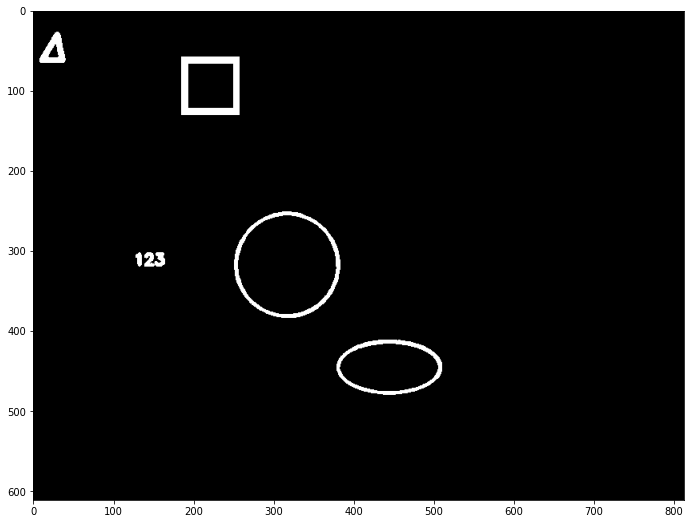

In [778]:
print_img(img_contours)

In [779]:
contours,hier = cv2.findContours(img_contours, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )

In [780]:
res_c_img = img_lab

In [781]:
spliter = np.mean([len(cont) for cont in contours])

In [782]:
curr_contours = {'square':[],'circle':[]}
for contour in contours:
  if len(contour) == 4:
    res_c_img = cv2.drawContours(res_c_img, [contour], 0, [255,0,0], 2)
    curr_contours['square'].append(contour)
  elif len(contour) >= spliter:
     res_c_img = cv2.drawContours(res_c_img, [contour], 0, [0,255,0], 2)
     curr_contours['circle'].append(contour)

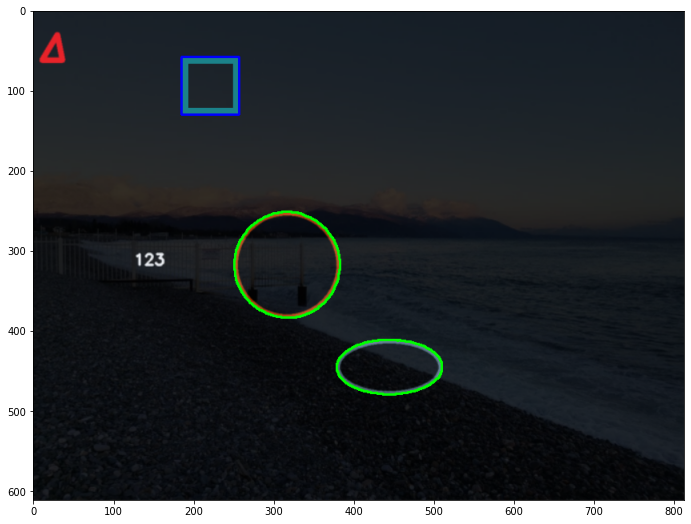

In [783]:
print_img(res_c_img)

In [784]:
#Площадь квадрата
cv2.contourArea(curr_contours['square'][0])

5184.0

In [785]:
#Периметр квадрата

In [786]:
#Периметр квадрата
cv2.arcLength(curr_contours['square'][0], True)

288.0

## Задание 2

In [787]:
from copy import deepcopy

In [788]:
img_task2 = cv2.imread(root_folder+"patric.jpg")

In [789]:
draw = deepcopy(img_task2)

In [790]:
kernel_size = 9
kernel_motion_blur = np.zeros((kernel_size, kernel_size))
kernel_motion_blur[int((kernel_size-1)/2), :] = np.ones(kernel_size)
kernel_motion_blur = kernel_motion_blur / kernel_size
blur_img = cv2.filter2D(img_task2, -1, kernel_motion_blur)

In [791]:
_, img_task_tmp = cv2.threshold(cv2.cvtColor(blur_img, cv2.COLOR_BGR2GRAY), 250,255,cv2.THRESH_BINARY_INV)

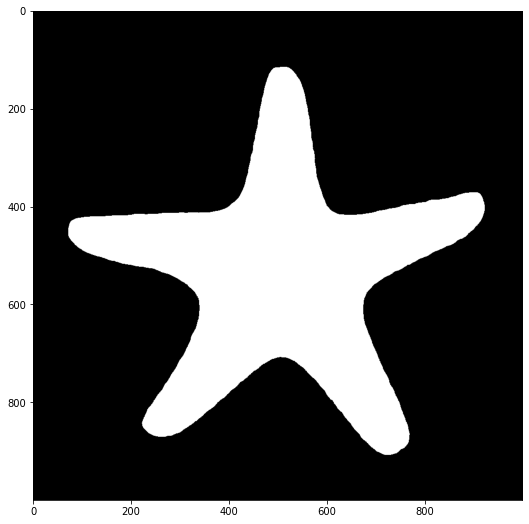

In [792]:
print_img(img_task_tmp)

In [793]:
contours, hierarchy = cv2.findContours(img_task_tmp,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [794]:
len(contours)

1

In [795]:
draw_cont = cv2.drawContours(img_task2, contours, -1, (0, 255, 0), 2) 

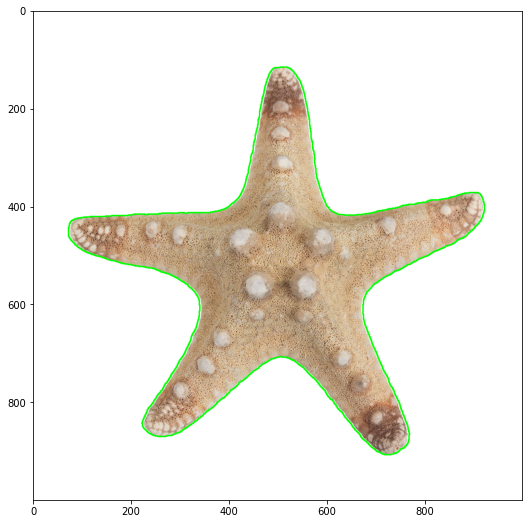

In [796]:
print_img(draw_cont)

In [797]:
hull = cv2.convexHull(contours[0])

In [798]:
hull_img = cv2.drawContours(img_task2, [hull], -1, (0, 0, 255), 2)

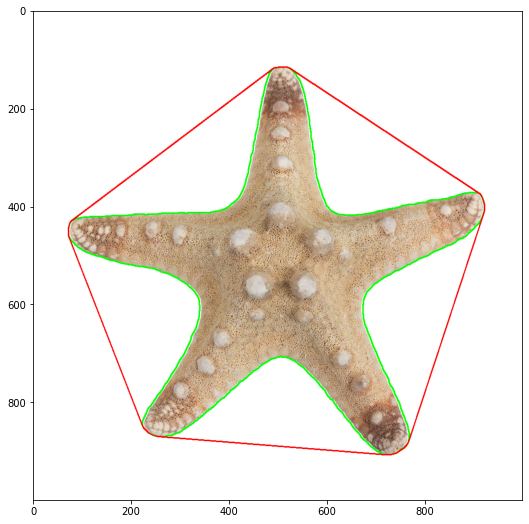

In [799]:
print_img(hull_img)

In [800]:
new_hull = cv2.convexHull(contours[0], returnPoints=False)

In [801]:
defects = cv2.convexityDefects(contours[0], new_hull)

for i in range(defects.shape[0]):
  s,e,f,d = defects[i,0]
  start = tuple(contours[0][s][0])
  end = tuple(contours[0][e][0])
  far = tuple(contours[0][f][0])
  cv2.line(hull_img,start,end,[130,120,0],3)
  cv2.circle(hull_img,far,5,[0,0,255],-1)

In [802]:
x_values = []
y_values = []

for element in contours[0]:
  element = element[0]
  x_values.append(element[0])
  y_values.append(element[1])

In [803]:
print(max(x_values), min(x_values))
print(max(y_values), min(y_values))

921 72
907 116


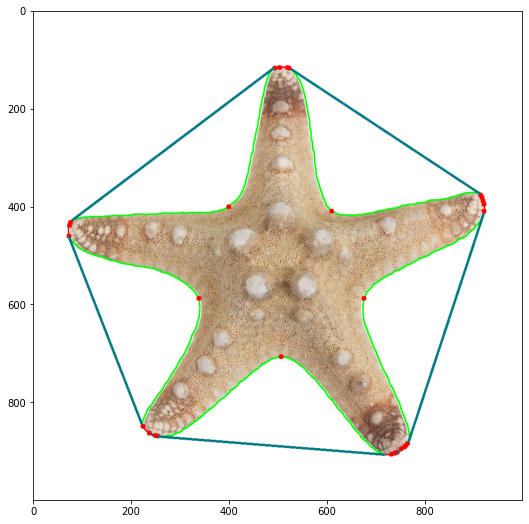

In [804]:
print_img(hull_img)

In [805]:
top = (min(x_values), min(y_values))
bottom = (max(x_values), max(y_values))
max_y_x = 0
for index in range(len(y_values)):
  if y_values[index] == bottom[1] and x_values[index] > max_y_x:
    max_y_x = x_values[index]

In [806]:
#Прямоугольник
draw = cv2.rectangle(draw,top,bottom,[255,0,0],2)

#Круг
x_ = top[0] + int((bottom[0]-top[0])/2)
y_ = top[1] + int((bottom[1]-top[1])/2)
radius = int(pow((x_ - max_y_x)**2+(y_ - bottom[1])**2,0.5))
draw = cv2.circle(draw,(x_,y_), radius, [0,70,200], 5)

#Эллипс
axe_x_len = int((bottom[0]-top[0])/2)
draw = cv2.ellipse(draw,(x_, y_), (axe_x_len, radius), 0, 0, 360, [134,120,90], 5)

#Ось
draw = cv2.line(draw, (x_, top[1]),(x_,bottom[1]), [0,255,0],3)

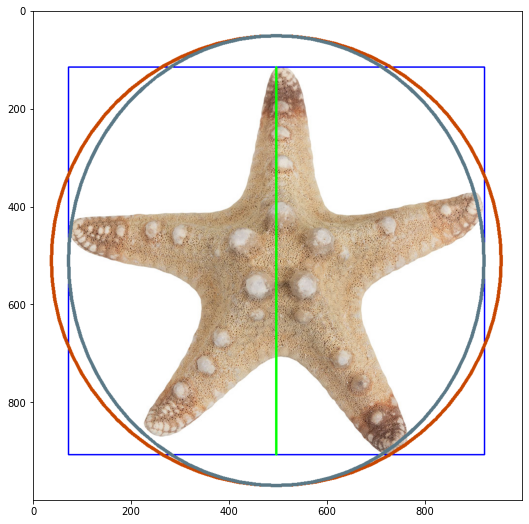

In [807]:
print_img(draw)

## Задание 3

In [808]:
rail_car = cv2.imread(root_folder+'railway_carriage.jpg')

In [809]:
kernel_size = 3
kernel_motion_blur = np.zeros((kernel_size, kernel_size))
kernel_motion_blur[int((kernel_size-1)/2), :] = np.ones(kernel_size)
kernel_motion_blur = kernel_motion_blur / kernel_size
blur_rail_car = cv2.filter2D(rail_car, -1, kernel_motion_blur)

In [810]:
ret, th_img = cv2.threshold(cv2.cvtColor(blur_rail_car, cv2.COLOR_BGR2GRAY), 170,255,cv2.THRESH_BINARY)

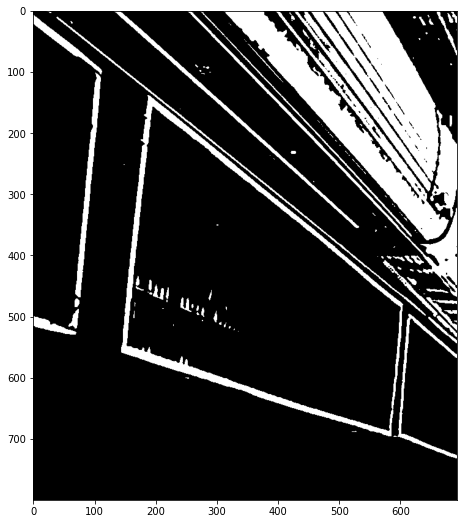

In [811]:
print_img(th_img)

In [812]:
contours, hierarchy = cv2.findContours(th_img,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [813]:
rail_car_draw = deepcopy(rail_car)
for index, cnt in enumerate(contours):
  rail_car_draw = cv2.drawContours(rail_car_draw,[cnt], 0, (0, 255, 0), 2)
  coord = tuple(cnt[0].reshape(2))
  rail_car_draw = cv2.putText(rail_car_draw, str(index), coord, cv2.FONT_HERSHEY_SIMPLEX, 0.7, [0,0,255],2)

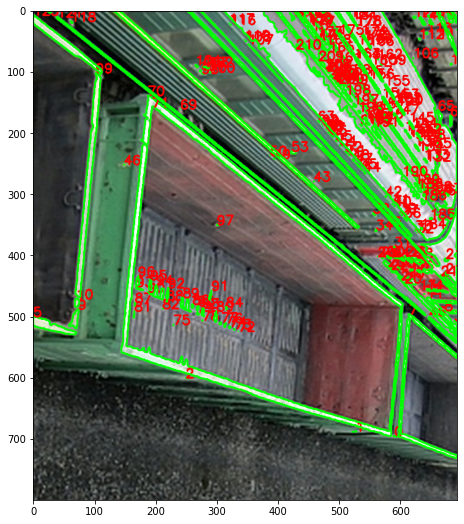

In [814]:
print_img(rail_car_draw)

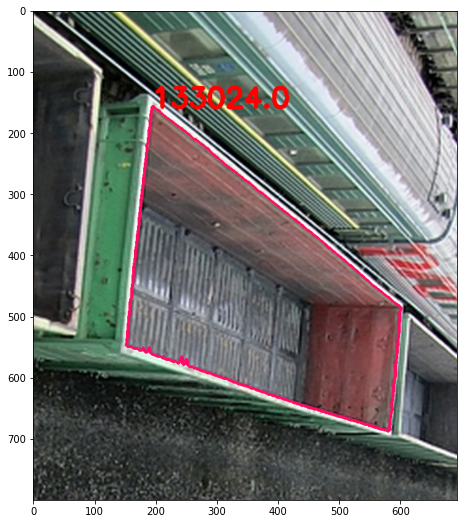

In [816]:
cnt = contours[71]
cont_railcar = cv2.drawContours(rail_car,[cnt], 0, (100, 10, 255), 3)
cont_railcar = cv2.putText(cont_railcar, str(cv2.contourArea(cnt)), tuple(cnt[0].reshape(2)), cv2.FONT_HERSHEY_SIMPLEX, 1.5, [0,0,255], 6) 
print_img(cont_railcar)